In [48]:
import pandas as pd
df=pd.read_csv('machine failure.csv')



In [49]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [51]:
df.drop(columns='Product ID',inplace=True)

In [52]:
df

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [53]:
df.index=df['UDI']

In [54]:
df.drop(columns='UDI',inplace=True)

In [55]:
df.TWF.value_counts()

0    9954
1      46
Name: TWF, dtype: int64

In [56]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


C:\Users\suraj\AppData\Local\Temp\ipykernel_13468\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

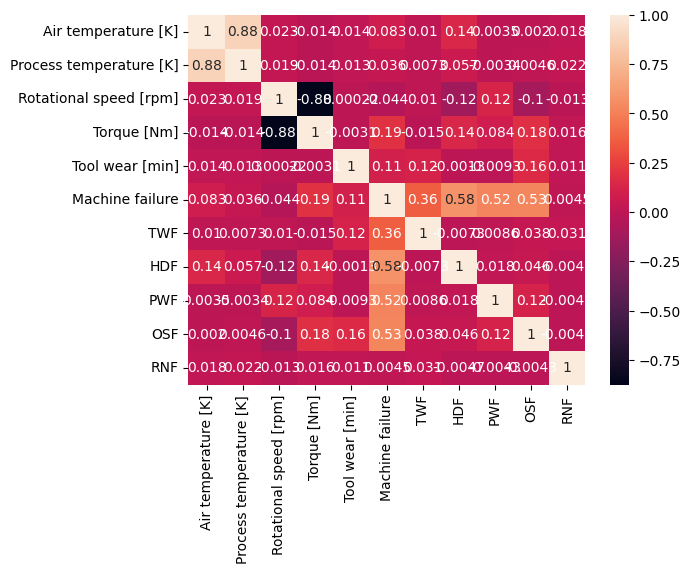

In [57]:
sns.heatmap(df.corr(),annot=True)

In [58]:
import scipy.stats
from scipy.stats import chi2

In [59]:
ct_table_ind=pd.crosstab(df["Type"],df["Machine failure"])
print('contingency_table :\n',ct_table_ind)

contingency_table :
 Machine failure     0    1
Type                      
H                 982   21
L                5765  235
M                2914   83


In [60]:
chi2_statistic = chi2.ppf(0.95, 4)
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind)

In [61]:
if chi2_stat>chi2_statistic:
    print("Reject the null hypothesis - There is a significant association.")
else:
    print("Fail to reject the null hypothesis - No significant association.")

Reject the null hypothesis - There is a significant association.


In [62]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [63]:
len(df['Type'].value_counts().index)

3

In [64]:
columns=['TWF', 'HDF', 'PWF', 'OSF', 'RNF','Type']

In [65]:
selcol=[]
for i in columns:
    ct_table_ind=pd.crosstab(df[i],df["Machine failure"])
    
    dof=len(df[i].value_counts().index)+len(df["Machine failure"].value_counts().index)-1
    chi2_statistic = chi2.ppf(0.95, 4)
    chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind)
    if chi2_stat>chi2_statistic:
        print("Reject the null hypothesis - There is a significant association. for {}".format(i))
        selcol.append(i)
    else:
        print("Fail to reject the null hypothesis - No significant association  for {}".format(i))
    

Reject the null hypothesis - There is a significant association. for TWF
Reject the null hypothesis - There is a significant association. for HDF
Reject the null hypothesis - There is a significant association. for PWF
Reject the null hypothesis - There is a significant association. for OSF
Fail to reject the null hypothesis - No significant association  for RNF
Reject the null hypothesis - There is a significant association. for Type


In [66]:
set(columns)

{'HDF', 'OSF', 'PWF', 'RNF', 'TWF', 'Type'}

In [67]:

for i in set(columns):
    for j in set(columns)-set(i):
        ct_table_ind=pd.crosstab(df[i],df[j])
        
        dof=len(df[i].value_counts().index)+len(df[j].value_counts().index)-1
        chi2_statistic = chi2.ppf(0.95, 4)
        chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind)
        if chi2_stat>chi2_statistic:
            print(f"Reject the null hypothesis - There is a significant association b/w  {i} {j}")
    
        # else:
            
        #     print(f"Fail to reject the null hypothesis - No significant association  for {i}  {j}")

Reject the null hypothesis - There is a significant association b/w  OSF OSF
Reject the null hypothesis - There is a significant association b/w  OSF PWF
Reject the null hypothesis - There is a significant association b/w  OSF HDF
Reject the null hypothesis - There is a significant association b/w  OSF Type
Reject the null hypothesis - There is a significant association b/w  TWF TWF
Reject the null hypothesis - There is a significant association b/w  PWF OSF
Reject the null hypothesis - There is a significant association b/w  PWF PWF
Reject the null hypothesis - There is a significant association b/w  HDF OSF
Reject the null hypothesis - There is a significant association b/w  HDF HDF
Reject the null hypothesis - There is a significant association b/w  Type OSF
Reject the null hypothesis - There is a significant association b/w  Type Type
Reject the null hypothesis - There is a significant association b/w  RNF RNF


In [68]:
selcol

['TWF', 'HDF', 'PWF', 'OSF', 'Type']

In [69]:
import scipy.stats as stats

# Example data (replace with your own data)
numerical_data = ['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
categorical_data = ['Machine failure','TWF', 'HDF', 'PWF', 'OSF', 'RNF','Type']

import statsmodels.api as sm
from statsmodels.formula.api import ols

for i in numerical_data:
        model = ols(f'Q("{i}") ~ Q("Machine failure")', data=df).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        if anova_table['PR(>F)'][0]<.05:
            print('REJECT THE NULL HYPOTHESIS This suggests that there is strong evidence to conclude that there is a significant relationship')
            selcol.append(i)
        else:
            print('Accepect Null Hypothesis')

REJECT THE NULL HYPOTHESIS This suggests that there is strong evidence to conclude that there is a significant relationship
REJECT THE NULL HYPOTHESIS This suggests that there is strong evidence to conclude that there is a significant relationship
REJECT THE NULL HYPOTHESIS This suggests that there is strong evidence to conclude that there is a significant relationship
REJECT THE NULL HYPOTHESIS This suggests that there is strong evidence to conclude that there is a significant relationship
REJECT THE NULL HYPOTHESIS This suggests that there is strong evidence to conclude that there is a significant relationship


In [70]:
selcol

['TWF',
 'HDF',
 'PWF',
 'OSF',
 'Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]']

In [71]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [72]:
selcol=set(selcol)-{'HDF', 'PWF','Type'}

In [73]:
selcol=list(selcol)

In [74]:
x=df[selcol]
y=df['Machine failure']

In [75]:
x.shape

(10000, 7)

In [76]:
y.shape

(10000,)

In [77]:
from sklearn.model_selection import train_test_split,KFold
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=21,train_size=.8)

In [78]:
# from sklearn.preprocessing import StandardScaler
# sts=StandardScaler()
# x_train=sts.fit_transform()

In [79]:
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)

In [81]:
pickle_model_path='.\\pickle\\pca.pkl'
import pickle
with open(pickle_model_path, 'wb') as model_file:
    pickle.dump(pca, model_file)

print(f"Successfully pickled and saved the model to {pickle_model_path}")

Successfully pickled and saved the model to .\pickle\pca.pkl


In [82]:
x_train

,OSF,TWF,Process temperature [K],Rotational speed [rpm],Torque [Nm],Air temperature [K],Tool wear [min]
UDI,,,,,,,
5505,0,0,312.2,1458,51.0,302.8,42
5308,0,0,313.3,1530,34.8,304.0,211
1685,0,0,307.3,1438,44.5,297.8,3
2442,0,0,308.5,1676,31.0,299.1,69
1,0,0,308.6,1551,42.8,298.1,0
...,...,...,...,...,...,...,...
9337,0,0,308.9,1725,31.9,298.5,205
49,0,0,309.2,1425,53.9,298.8,135
8965,0,0,307.9,1456,44.9,297.2,85


In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

logreg_classifier = LogisticRegression()
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()
xgb_classifier = XGBClassifier()


pipeline_logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', logreg_classifier)
])

pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', dt_classifier)
])

pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', rf_classifier)
])

pipeline_xgb = Pipeline([
    ('classifier', xgb_classifier)
])


# Train the models using the pipeline
pipeline_logreg.fit(x_train_pca, y_train)
pipeline_dt.fit(x_train_pca, y_train)
pipeline_rf.fit(x_train_pca, y_train)
pipeline_xgb.fit(x_train_pca, y_train)

# Make predictions on the test set
y_pred_logreg = pipeline_logreg.predict(x_test_pca)
y_pred_dt = pipeline_dt.predict(x_test_pca)
y_pred_rf = pipeline_rf.predict(x_test_pca)
y_pred_xgb = pipeline_xgb.predict(x_test_pca)

# Evaluate the models
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

In [84]:
print("Logistic Regression Accuracy:", accuracy_logreg)
print("Decision Tree Accuracy:", accuracy_dt)
print("Random Forest Accuracy:", accuracy_rf)
print("XGBoost Accuracy:", accuracy_xgb)

Logistic Regression Accuracy: 0.966
Decision Tree Accuracy: 0.981
Random Forest Accuracy: 0.988
XGBoost Accuracy: 0.9875


In [85]:
pickle_model_path = '.\\pickle\\logistic.pkl'

# Pickle the trained model and save it to a file
with open(pickle_model_path, 'wb') as model_file:
    pickle.dump(pipeline_logreg, model_file)


pickle_model_path = '.\\pickle\\decision.pkl'
# Pickle the trained model and save it to a file
with open(pickle_model_path, 'wb') as model_file:
    pickle.dump(pipeline_dt, model_file)


pickle_model_path = '.\\pickle\\randomforest.pkl'

# Pickle the trained model and save it to a file
with open(pickle_model_path, 'wb') as model_file:
    pickle.dump(pipeline_rf, model_file)


pickle_model_path = '.\\pickle\\xgboost.pkl'
# Pickle the trained model and save it to a file
with open(pickle_model_path, 'wb') as model_file:
    pickle.dump(pipeline_xgb, model_file)


In [114]:
import zipfile


# Open the zip file
with zipfile.ZipFile('test.csv.zip', 'r') as zip_ref:
    # Extract all contents into the specified directory
    zip_ref.extractall()

print("Successfully extracted")


Successfully extracted


In [87]:
dftest=pd.read_csv('test.csv')

In [88]:
dftest.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [89]:
dftest=dftest[selcol]

In [90]:
dftest.head()

,OSF,TWF,Process temperature [K],Rotational speed [rpm],Torque [Nm],Air temperature [K],Tool wear [min]
0,0,0,311.5,1499,38.0,302.3,60
1,0,0,311.0,1713,28.8,301.7,17
2,0,0,310.4,1525,37.7,301.3,96
3,0,0,309.6,1479,47.6,300.1,5
4,0,0,312.3,1515,41.3,303.4,114


In [91]:
dftest_pca=pca.transform(dftest)

In [92]:
# Make predictions on the test set
y_pred_logreg = pipeline_logreg.predict(dftest_pca)
y_pred_dt = pipeline_dt.predict(dftest_pca)
y_pred_rf = pipeline_rf.predict(dftest_pca)
y_pred_xgb = pipeline_xgb.predict(dftest_pca)

In [101]:
id=pd.read_csv('test.csv')['id']


In [110]:
subb=pd.DataFrame(id).join(pd.DataFrame(y_pred_logreg))
subb=subb.rename(columns={'id':'id',0:'Machine failure'})
subb


,id,Machine failure
0,136429,0
1,136430,0
2,136431,0
3,136432,0
4,136433,0
...,...,...
90949,227378,0
90950,227379,0
90951,227380,0
90952,227381,0


In [111]:
subb=pd.DataFrame(id).join(pd.DataFrame(y_pred_dt))
subb=subb.rename(columns={'id':'id',0:'Machine failure'})
subb


,id,Machine failure
0,136429,0
1,136430,0
2,136431,0
3,136432,0
4,136433,0
...,...,...
90949,227378,0
90950,227379,0
90951,227380,0
90952,227381,0


In [112]:
subb=pd.DataFrame(id).join(pd.DataFrame(y_pred_rf))
subb=subb.rename(columns={'id':'id',0:'Machine failure'})
subb

,id,Machine failure
0,136429,0
1,136430,0
2,136431,0
3,136432,0
4,136433,0
...,...,...
90949,227378,0
90950,227379,0
90951,227380,0
90952,227381,0


In [113]:
subb=pd.DataFrame(id).join(pd.DataFrame(y_pred_xgb))
subb=subb.rename(columns={'id':'id',0:'Machine failure'})
subb

,id,Machine failure
0,136429,0
1,136430,0
2,136431,0
3,136432,0
4,136433,0
...,...,...
90949,227378,0
90950,227379,0
90951,227380,0
90952,227381,0
